<a href="https://colab.research.google.com/github/R3noir/CCDEPLRL_EXERCISES_COM211/blob/main/Exercise%205/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://raw.githubusercontent.com/robitussin/CCDEPLRL_EXERCISES/main/datasets/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2024-05-30 07:52:35--  https://raw.githubusercontent.com/robitussin/CCDEPLRL_EXERCISES/main/datasets/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95662 (93K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  93.42K  --.-KB/s    in 0.02s   

2024-05-30 07:52:35 (4.19 MB/s) - ‘/tmp/sonnets.txt’ saved [95662/95662]



1. Create the LSTM model

In [19]:
model = Sequential()
model.add(Embedding(total_words, 70, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.35))
model.add(LSTM(256))
model.add(Dense(128, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), ))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 70)            236250    
                                                                 
 bidirectional_6 (Bidirecti  (None, 10, 1024)          2387968   
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 10, 1024)          0         
                                                                 
 lstm_12 (LSTM)              (None, 256)               1311744   
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 3375)              435375    
                                                      

In [20]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 18s 23ms/step - loss: 6.9023 - accuracy: 0.0218
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4643 - accuracy: 0.0309
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2943 - accuracy: 0.0395
Epoch 4/100
484/484 [==============================] - 6s 11ms/step - loss: 6.1249 - accuracy: 0.0475
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9704 - accuracy: 0.0511
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8414 - accuracy: 0.0567
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 5.7351 - accuracy: 0.0621
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.6297 - accuracy: 0.0661
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 5.5221 - accuracy: 0.0699
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.40

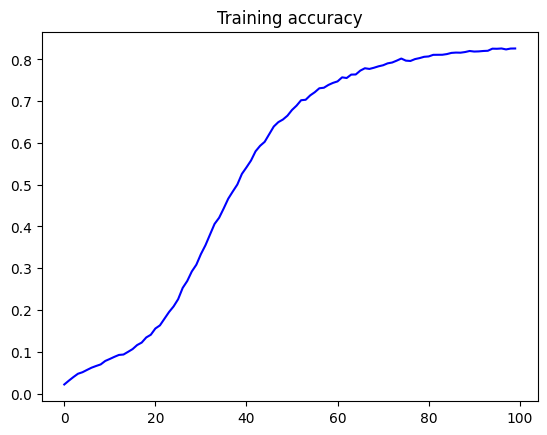

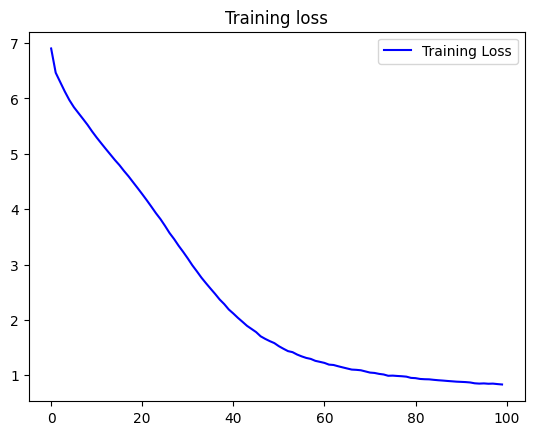

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "From fairest creatures we desire increase"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 21ms/step
From fairest creatures we desire increase doth shape again assured made thee of blot the 'will' ' mute time glance aside none ' ' by end told her deeds or it ' transferr'd kind with thee bright thee thee thee mad near messengers kindness detain pain less me light'st done stewards ere this ' say tongue less ' stewards upon this days the see of praise open air held fill'd thee with made perfection write on impression write good chest eye with tongue dyed erred time's rest wing ' ' end again bred call through 'twixt ' fled pace perceived slain done decay free thee thee
